In [ ]:
!pip install nltk
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install -U imbalanced-learn
!pip install pyspellchecker


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Oculta warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# CARGAR DATOS
**DATOS DE ENTRENAMIENTO**

la columna de trastornos indica si el TWEET es de una persona con depresión o es de control.


**control**:     0

**depresión**:   1

In [ ]:
ruta_archivo_entrenamiento = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263841 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,RT @Julii_AKD: por qué a la mayoría de las pib...,1
1,6,2.147484e+09,Empezar un 2017 sintiéndote solo.,1
2,279,2.147484e+09,Ah mirá que lindo como me escrachan en Instagr...,0
3,518,2.147484e+09,https://t.co/hC3rULMb1P,0
4,301,2.147484e+09,"Tu sigue con él, cumple tu deber, muy pronto v...",0
5,177,2.147484e+09,@Sebbasrp deje dormir al prójimo.,0
6,45,2.147484e+09,"RT @Crookedgirlx: no quiero vivir más, estoy c...",1
7,29,2.147484e+09,RT @Esunbreakable: Me da un poquito de vergüen...,1
8,388,2.147484e+09,Venezuela-related Designation https://t.co/IOZ...,0
9,31,2.147484e+09,Tengo muchas ganas de escribirte para decirte ...,1


#DATOS DE PRUEBA

In [ ]:
#num_docs = 500

In [ ]:
ruta_archivo_prueba = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
#data = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
#data_train = data.iloc[:num_docs, :]
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263841 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,RT @Julii_AKD: por qué a la mayoría de las pib...,1
1,6,2.147484e+09,Empezar un 2017 sintiéndote solo.,1
2,279,2.147484e+09,Ah mirá que lindo como me escrachan en Instagr...,0
3,518,2.147484e+09,https://t.co/hC3rULMb1P,0
4,301,2.147484e+09,"Tu sigue con él, cumple tu deber, muy pronto v...",0
5,177,2.147484e+09,@Sebbasrp deje dormir al prójimo.,0
6,45,2.147484e+09,"RT @Crookedgirlx: no quiero vivir más, estoy c...",1
7,29,2.147484e+09,RT @Esunbreakable: Me da un poquito de vergüen...,1
8,388,2.147484e+09,Venezuela-related Designation https://t.co/IOZ...,0
9,31,2.147484e+09,Tengo muchas ganas de escribirte para decirte ...,1


# DATOS DE PRUEBA (TEST)

In [ ]:
num_docs_test = 50000

In [ ]:
ruta_archivo_prueba = '/content/drive/MyDrive/Experimentación Python Tesis /entrenamiento y prueba/test.csv'
# data_test = pd.read_csv(ruta_archivo_prueba, lineterminator='\n')
data_t = pd.read_csv(ruta_archivo_prueba, lineterminator='\n')
data_test =data_t.iloc[:num_docs_test, :]
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   USER_ID     50000 non-null  int64 
 1   TWEET_ID    50000 non-null  int64 
 2   TWEET_TEXT  50000 non-null  object
 3   trastorno   50000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,30,2147483647,RT @Unicornio_Azul5: ¿Está mal desear estar mu...,1
1,508,2147483647,RT @tachame_ladoble: Esta noche!! Volvemos a V...,0
2,279,2147483647,RT @PsychdelicPics: Art by I Love Doodle https...,0
3,12,2147483647,Hoy no he pasado de las 700kcal.,1
4,277,2147483647,RT @NetSportAcademy: Elisa Luque se proclama c...,0


#Preprocesamiento de los datos

In [ ]:
import nltk
nltk.download('stopwords')  #Solamente se ha de descargar la primera vez.
stopwords_es = nltk.corpus.stopwords.words('spanish')   # Extrae las stopwords en español

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


*Eliminar etiquetas HTML*

In [ ]:
import re

def removeHTML(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', text)
        return cleantext
    else:
        return text  # Devolver el valor original si no es de tipo string

*Limpieza del texto*

In [ ]:
import re
import string

def clean(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        # Eliminar hashtags
        text = re.sub(r'#\w+', '', text)

        # Eliminar URLs o enlaces
        text = re.sub(r'(https?://)?[a-zA-Z0-9]+\.[a-zA-Z0-9]+\S*', '', text)

        # Eliminar nombres de usuarios de Twitter
        text = re.sub(r'@\w+', '', text)

        # Eliminar Nombres propios
        text = re.sub(r'\b[A-Z][a-z]+\b', '', text)

        # Eliminar todos los caracteres especiales
        text = re.sub(r'[^\w\s]+', '', text)

        # Eliminar prefijos y números
        text = re.sub(r'\b\w{1,2}\b|\d+', '', text)

        # Eliminar palabras específicas
        specific_words = ['retweet', 'retweets', 'hashtag', 'trending', 'mención', 'enlace', 'emoji', 'timeline', 'interacciones',
                          'tuit', 'seguidores', 'notificaciones', 'seguir', 'favorito', 'perfil', 'tendencia', 'influencer',
                          'compartir', 'actualización', 'explorar', 'seguir', 'comunidad', 'contenido', 'popular',
                          'recomendar', 'experiencia', 'conectar', 'comentar', 'compartir', 'comunidad', 'actualización',
                          'drk', 'followers', 'stats', 'for', 'new', 'little', 'unfollower', 'unfollowers', 'today', 'shit','twitter','nombre',
                          'eric','story','great', 'short','squeeze','piggly','wiggly','hmv','even','follas','you','i','he','she',
                          'it','we','they','the','and','that','these','those','tweet','followed','follower']
        text = ' '.join([word for word in text.split() if word not in specific_words])

        # Eliminar emojis
        emojis = re.findall(r'[^\w\s,]', text)
        cleaned_emojis = [emoji for emoji in emojis if emoji not in ['@', '#', '/', '?','¿','.','…','"',':','“','!','¡','°','-',"‘",'’',
                                                                     '=',';','(',')',"'","'",'&','€','%','$','*','+','|', '”','🇦','🇷',',',
                                                                     ', ','—','«',' »','»','« ','[, ]','[,]',',',', ','',' ',' ♀',' 🏽']]
        for emoji in cleaned_emojis:
            text = text.replace(emoji, '')

        # Convertir el texto a minúsculas
        text = text.lower()

        # Eliminar signos de puntuación
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
        # Tokenizar el texto en palabras
        words = text.split()

        # Eliminar palabras vacías
        words = [word for word in words if word not in stopwords_es]

        # Reconstruir el texto limpio
        text = ' '.join(words)

        # Devuelve el texto limpio
        return text
    else:
        return text  # Devolver el valor original si no es de tipo string

*corrección de palabras o tokens*

In [ ]:
from spellchecker import SpellChecker

def corrector_ortografico(tokens):
    spell = SpellChecker(language='es')
    tokens_corregidos = [spell.correction(token) if spell.correction(token) is not None else token for token in tokens]
    return tokens_corregidos

def corregir_palabras_largas(tokens):
    tokens_corregidos = []
    for token in tokens:
        # Corregir repeticiones de letras
        token_corregido = re.sub(r'(.)\1+', r'\1\1', token)

        # Corregir alargamiento de palabras
        token_corregido = re.sub(r'(\w)\1{2,}', r'\1\1', token_corregido)

        # Eliminar vocales repetidas más de 2 veces seguidas
        token_corregido = re.sub(r'([aeiouáéíóú]{2,})\1+', r'\1', token_corregido, flags=re.IGNORECASE)

        tokens_corregidos.append(token_corregido)
    return tokens_corregidos

*lematizar y extraer términos*

In [ ]:
import pandas as pd
import spacy
from spacy.lang.es import Spanish
from nltk.corpus import stopwords


# Cargar modelo de spaCy
nlp = spacy.load("es_core_news_sm")

# Cargar stopwords en español
stopwords_es = set(stopwords.words('spanish'))

def extractTerms(text):
    if isinstance(text, str):
        # Tokenización y lematización con spaCy
        doc = nlp(text)
        lemmatized_terms = [token.lemma_ for token in doc if token.text.lower() not in stopwords_es]

        return lemmatized_terms
    else:
        return []  # Devolver una lista vacía si el texto no es una cadena de texto

# Ejemplo de uso
texto_ejemplo = "Los gatos están saltando sobre las vallas"
terminos_extraidos = extractTerms(texto_ejemplo)
print(terminos_extraidos)

['gato', 'saltar', 'valla']


# Preprocesamieto del conjunto de datos de entrenamiento

In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(removeHTML)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(clean)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(extractTerms)
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263950 entries, 0 to 263949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     263950 non-null  object 
 1   TWEET_ID    263920 non-null  float64
 2   TWEET_TEXT  263950 non-null  object 
 3   trastorno   263950 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.1+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,87,2.147484e+09,"[mayoría, piba, gustar, tener, pierna, grande,...",1
1,6,2.147484e+09,"[sintiéndote, solo]",1
2,279,2.147484e+09,"[mier, lindo, escrachan, magnifico]",0
3,518,2.147484e+09,[],0
4,301,2.147484e+09,"[seguir, cumple, deber, pronto, vestido, novia...",0
5,177,2.147484e+09,"[dejar, dormir, prójimo]",0
6,45,2.147484e+09,"[querer, vivir, cansado]",1
7,29,2.147484e+09,"[poquito, vergüenza, alguien, querer, alzar yo...",1
8,388,2.147484e+09,[related],0
9,31,2.147484e+09,"[mucho, gana, escribirtar, decirte, extraño, d...",1


In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 17995


In [ ]:
# Filtrar filas donde 'TWEET_TEXT' no sea una lista vacía
data_train = data_train[data_train['TWEET_TEXT'].apply(len) > 0]

# Reiniciar el índice del DataFrame después de eliminar filas
data_train.reset_index(drop=True, inplace=True)

In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 0


In [ ]:
from spellchecker import SpellChecker

def corrector_ortografico(tokens):
    spell = SpellChecker(language='es')
    tokens_corregidos = [spell.correction(token) if spell.correction(token) is not None else token for token in tokens]
    return tokens_corregidos

def corregir_palabras_largas(tokens):
    tokens_corregidos = []
    for token in tokens:
        # Corregir repeticiones de letras
        token_corregido = re.sub(r'(.)\1+', r'\1\1', token)

        # Corregir alargamiento de palabras
        token_corregido = re.sub(r'(\w)\1{2,}', r'\1\1', token_corregido)

        # Eliminar vocales repetidas más de 2 veces seguidas
        token_corregido = re.sub(r'([aeiouáéíóú]{2,})\1+', r'\1', token_corregido, flags=re.IGNORECASE)

        tokens_corregidos.append(token_corregido)
    return tokens_corregidos

In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(corregir_palabras_largas)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(corrector_ortografico)
data_train.info()
data_train.head(10)

In [ ]:
# Especifica la ubicación y el nombre del archivo CSV donde deseas guardar los datos procesados
csv_path = '/content/drive/MyDrive/Experimentación Python Tesis /Tweets preprocesados.csv'

# Guarda el DataFrame en un nuevo archivo CSV
data_train.to_csv(csv_path, index=False)

print(f"Los datos procesados se han guardado en '{csv_path}'")

Los datos procesados se han guardado en '/content/drive/MyDrive/Experimentación Python Tesis /Tweets preprocesados.csv'


#Representación de los datos

La caracterización de texto mediente Embedding transforma cada palabra del contexto en un vector de embedding.



In [ ]:
import gensim
from gensim.models import Word2Vec
# Entrena un modelo Word2Vec usando CBOW
modelW = Word2Vec(data_train['TWEET_TEXT'], vector_size=100, window=5, min_count=1, sg=0)# - vector_size: el tamaño de los vectores de palabra
# - window: el tamaño de la ventana de contexto
# - min_count: el número mínimo de veces que una palabra debe aparecer para ser considerada
# - sg: 0 para CBOW, 1 para Skip-gram

# Obtener la representación vectorial de un documento promediando las palabras
def document_vector(tokens, modelW):
    # Filtrar palabras que no están en el modelo
    tokens = [token for token in tokens if token in modelW.wv.key_to_index]
    if len(tokens) == 0:
        return np.zeros(modelW.vector_size)
    return np.mean([modelW.wv[token] for token in tokens], axis=0)

# Crear una matriz de características X utilizando las representaciones vectoriales de Word2Vec
X = [document_vector(tokens, modelW) for tokens in data_train['TWEET_TEXT']]

# Obtener las etiquetas y
y = data_train['trastorno'].values

# Ahora puedes usar X e y para entrenar tu modelo de clasificación como se mencionó anteriormente

In [ ]:
# Imprimimos el la longitud de las palabras totales
print(modelW)
print(len(modelW.wv))
# Observamos el vocabulario creado
words = modelW.wv.index_to_key
print(words)

In [ ]:
# Obtener la representación vectorial de una palabra específica
vector = modelW.wv['depresión']
vector

array([-0.5816197 ,  0.20342186,  0.50530124,  0.5105763 ,  0.48171666,
       -0.7693977 , -0.03033718,  1.0272155 , -0.66363645, -0.19895528,
       -0.30262622, -0.6264413 , -0.24910797,  1.0896322 , -0.07011116,
       -0.8312332 ,  1.0734984 , -1.2917019 , -0.28137496, -1.4066894 ,
        0.73712814,  0.5277778 ,  0.14352886, -1.2898228 ,  0.7513592 ,
       -0.3028222 , -0.79617405, -0.7316022 , -1.7554736 , -0.7232227 ,
        0.88375264,  0.6808565 , -0.35110736, -1.1372833 ,  0.3644939 ,
        1.49745   , -0.722436  , -0.35260278, -1.2635397 , -0.25796977,
       -1.0117137 , -0.22058842, -0.14867215,  0.1098223 , -0.08057728,
       -0.6138829 , -0.52161884, -0.6435361 ,  0.20481935,  1.2778997 ,
        1.1476058 ,  0.37673336, -1.6168646 ,  0.171177  , -0.6156618 ,
       -0.49606046, -0.15595034,  0.26767737, -0.6617125 ,  0.99446404,
       -0.35299873,  0.25704506, -0.37860498, -0.13619941, -0.95409507,
        0.6032492 ,  0.5454086 ,  0.13639751, -0.7694949 ,  1.43

# Aprensizaje del modelo: Regresión Logística
**Validación Cruzada K=10**

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# Supongamos que X es una lista de representaciones vectoriales Word2Vec y y son las etiquetas (0 o 1)
X = X  # Aquí, X ya contiene las representaciones vectoriales de Word2Vec
y = np.array(y)

# Realizar balanceo si es necesario (oversampling)
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

# Ahora, X y y tienen el mismo número de muestras

# Definir la estrategia de validación cruzada (k=10)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar métricas de entrenamiento y validación
train_accuracy_scores = []
train_precision_scores = []
train_recall_scores = []
train_f1_scores = []

val_accuracy_scores = []
val_precision_scores = []
val_recall_scores = []
val_f1_scores = []

# Realizar la validación cruzada
for train_index, val_index in cv.split(X, y):
    train_index, val_index = train_index.tolist(), val_index.tolist()  # Convertir a listas
    X_train, X_val = np.array(X)[train_index], np.array(X)[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Crear un modelo de Regresión Logística para cada fold
    model = LogisticRegression(C=1000, random_state=42)

    # Entrenar el modelo en los datos de entrenamiento del pliegue actual
    model.fit(X_train, y_train)

    # Predecir las etiquetas en el conjunto de entrenamiento del pliegue actual
    y_train_pred = model.predict(X_train)

    # Calcular métricas de entrenamiento y agregarlas a las listas
    train_accuracy_scores.append(accuracy_score(y_train, y_train_pred))
    train_precision_scores.append(precision_score(y_train, y_train_pred))
    train_recall_scores.append(recall_score(y_train, y_train_pred))
    train_f1_scores.append(f1_score(y_train, y_train_pred))

    # Predecir las etiquetas en el conjunto de validación
    y_val_pred = model.predict(X_val)

    # Calcular métricas de validación y agregarlas a las listas
    val_accuracy_scores.append(accuracy_score(y_val, y_val_pred))
    val_precision_scores.append(precision_score(y_val, y_val_pred))
    val_recall_scores.append(recall_score(y_val, y_val_pred))
    val_f1_scores.append(f1_score(y_val, y_val_pred))

# Calcular las métricas promediadas en entrenamiento
train_accuracy_mean = np.mean(train_accuracy_scores)
train_precision_mean = np.mean(train_precision_scores)
train_recall_mean = np.mean(train_recall_scores)
train_f1_mean = np.mean(train_f1_scores)

# Calcular las métricas promediadas en validación
val_accuracy_mean = np.mean(val_accuracy_scores)
val_precision_mean = np.mean(val_precision_scores)
val_recall_mean = np.mean(val_recall_scores)
val_f1_mean = np.mean(val_f1_scores)


In [ ]:
# Imprimir las métricas en entrenamiento
print("Entrenamiento - Accuracy: {:.2f}%".format(100 * train_accuracy_mean))
print("Entrenamiento - Precision: {:.2f}%".format(100 * train_precision_mean))
print("Entrenamiento - Recall: {:.2f}%".format(100 * train_recall_mean))
print("Entrenamiento - F1 Score: {:.2f}%".format(100 * train_f1_mean))
print('------------------------------------------------------------------')
# Imprimir las métricas en validación
print("Validación - Accuracy: {:.2f}%".format(100 * val_accuracy_mean))
print("Validación - Precision: {:.2f}%".format(100 * val_precision_mean))
print("Validación - Recall: {:.2f}%".format(100 * val_recall_mean))
print("Validación - F1 Score: {:.2f}%".format(100 * val_f1_mean))



Entrenamiento - Accuracy: 71.83%
Entrenamiento - Precision: 72.57%
Entrenamiento - Recall: 70.18%
Entrenamiento - F1 Score: 71.35%
------------------------------------------------------------------
Validación - Accuracy: 71.78%
Validación - Precision: 72.52%
Validación - Recall: 70.15%
Validación - F1 Score: 71.31%


# Guardar el modelo


In [ ]:
import joblib
import os
# Directorio para guardar modelos entrenados
model_dir = '/content/drive/MyDrive/Experimentación Python Tesis /Modelos ya entrenados'
model_filename = 'TWEETS_depresivos (RL-Word2Vec).pkl'
model_path_p = os.path.join(model_dir, model_filename)

# Guardar el modelo entrenado
joblib.dump(model, model_path_p)

['/content/drive/MyDrive/Experimentación Python Tesis /Modelos ya entrenados/TWEETS_depresivos (RL-Word2Vec).pkl']

# Evaluación

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Función para calcular el vector promedio de un documento
def document_vector(tokens, modeWl):
    # Filtrar palabras que no están en el modelo Word2Vec
    tokens = [token for token in tokens if token in modelW.wv.key_to_index]
    if len(tokens) == 0:
        return np.zeros(modelW.vector_size)
    return np.mean([modelW.wv[token] for token in tokens], axis=0)

# Aplicar transformaciones al conjunto de pruebas
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(removeHTML)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(clean)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(extractTerms)

# Obtener representaciones Word2Vec para el conjunto de pruebas
X_test_word2vec = [document_vector(tokens, modelW) for tokens in data_test['TWEET_TEXT']]

# Crear el conjunto de pruebas
X_test = np.array(X_test_word2vec)
y_test = data_test['trastorno'].values

# Predicciones en el conjunto de pruebas
y_test_pred = (model.predict(X_test) > 0.5).astype(int)  #  umbral de 0.5 para la clasificación

# Calcular precisión en el conjunto de pruebas
precision_test = precision_score(y_test, y_test_pred)

# Calcular exhaustividad (recall) en el conjunto de pruebas
recall_test = recall_score(y_test, y_test_pred)

# Calcular puntuación F1 en el conjunto de pruebas
f1_test = f1_score(y_test, y_test_pred)

# Calcular exactitud en el conjunto de pruebas (opcional)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Imprimir métricas de evaluación con el símbolo '%'
print("Precisión: {:.2f}%".format(precision_test * 100))
print("Exhaustividad (Recall): {:.2f}%".format(recall_test * 100))
print("Puntuación F1: {:.2f}%".format(f1_test * 100))
print("Exactitud: {:.2f}%".format(accuracy_test * 100))





Precisión: 74.11%
Exhaustividad (Recall): 60.00%
Puntuación F1: 66.31%
Exactitud: 68.30%


# MATRIZ DE CONFUSIÓN

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(X_test)

# Obtiene la matriz de confusión. Las filas corresponden a las clases reales,
umbral = 0.5  # Puedes ajustar este umbral según tus necesidades
y_pred_binario = (y_pred > umbral).astype(int)

# Calcular la matriz de confusión con las etiquetas binarias
cm = confusion_matrix(y_test, y_pred_binario)
prop_real = np.sum(y_test)/len(y_test)
prop_etiqutados = (cm[0,1]+cm[1,1])/len(y_test)

print("Matriz de confusión: \n\n", cm, "\n")
print('Proporción de comentarios positivos: %.2f'% prop_real)
print('Proporción de comentarios positivos etiquetados: %.2f'% prop_etiqutados)

Matriz de confusión: 

 [[13689 11313]
 [ 9625 15377]] 

Proporción de comentarios positivos: 0.50
Proporción de comentarios positivos etiquetados: 0.53


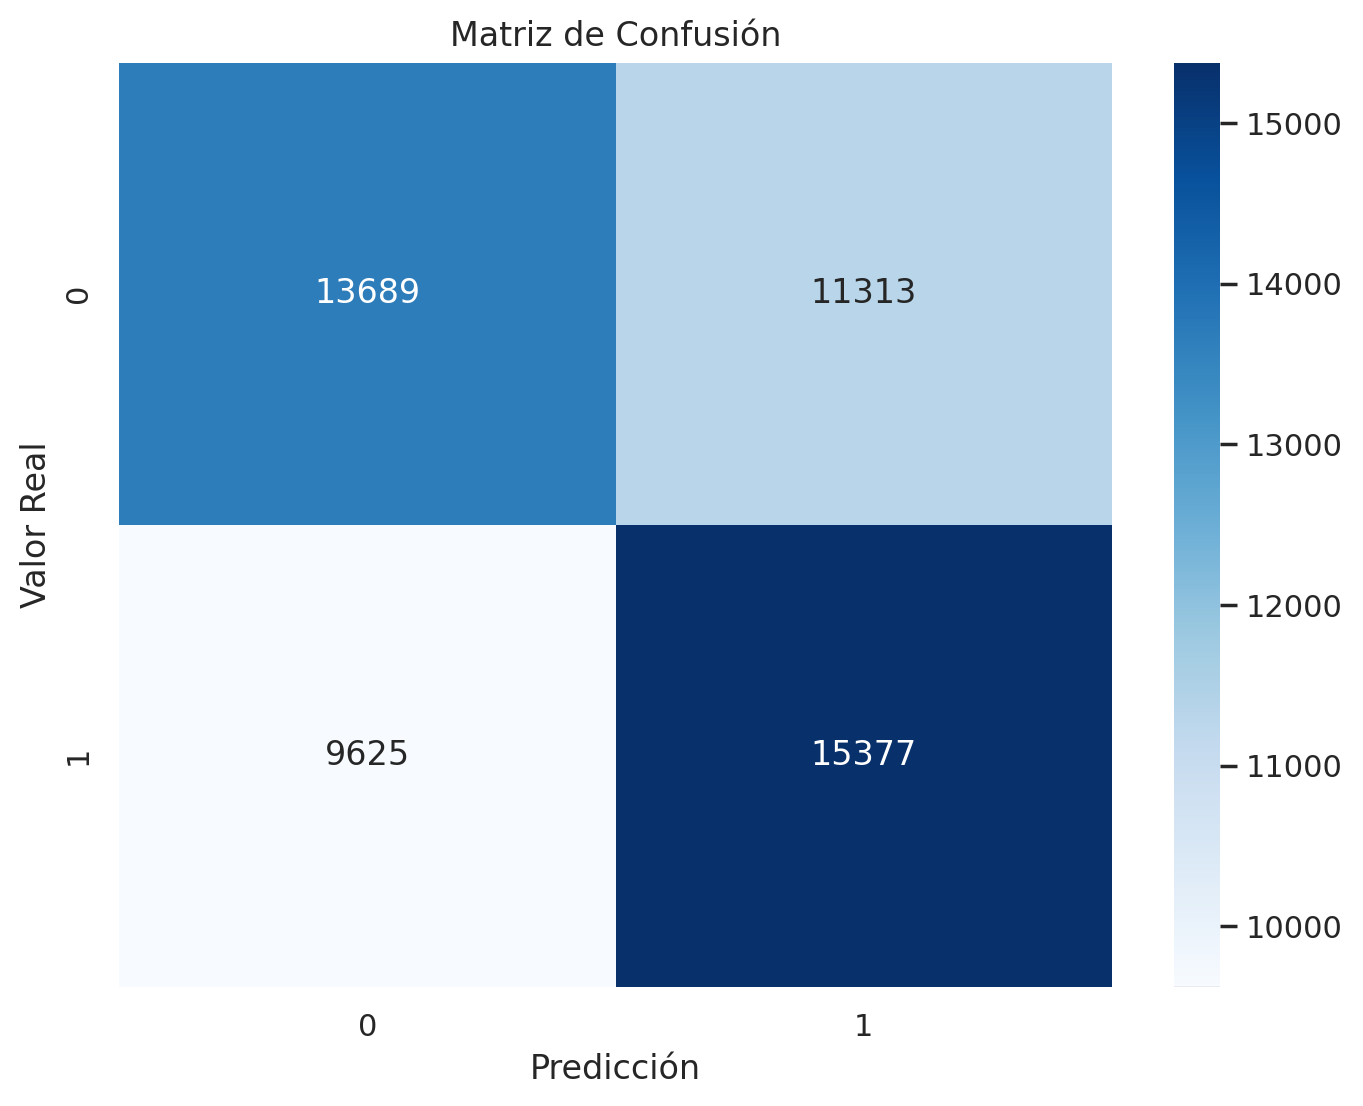

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))

# Crear una matriz de confusión usando el heatmap de Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])

# Etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

# Modelo Entrenado

In [ ]:
import joblib
import numpy as np

# Cargar el modelo entrenado
model_path = '/content/drive/MyDrive/Experimentación Python Tesis /Modelos ya entrenados/TWEETS_depresivos (RL-Word2Vec).pkl'
loaded_model = joblib.load(model_path)

# Texto de ejemplo para predecir
new_tweet = "RT @chicasuicida876: Mis cicatrices son prueba de que estoy luchando con demonios que están tratando de matarme😓💔"

# Preprocesamiento del texto (asumiendo que ya tienes las funciones definidas)
new_tweet_cleaned = clean(removeHTML(new_tweet))
new_tweet_extracted = extractTerms(new_tweet_cleaned)

# Supongamos que 'modelW' es tu modelo Word2Vec entrenado previamente
new_tweet_word2vec = document_vector(new_tweet_extracted, modelW)

# Redimensionar new_tweet_word2vec a una matriz 2D
new_tweet_word2vec = np.array([new_tweet_word2vec])

# Hacer la predicción y obtener las probabilidades de ambas clases
proba_prediction = loaded_model.predict_proba(new_tweet_word2vec)
control_prob = proba_prediction[0][0]  # Probabilidad de ser control
depresion_prob = proba_prediction[0][1]  # Probabilidad de ser depresión
# Imprimir el resultado de la predicción
print(new_tweet)
print('------------------------------------------------------------------')
if depresion_prob > control_prob:
    print("Este tweet es de depresión")
    print("Probabilidad de que el tweet sea de depresión: {:.2f}%".format(depresion_prob * 100))
else:
    print("Este tweet No es de depresión")
    print("Probabilidad de que el tweet no sea de depresión: {:.2f}%".format(control_prob * 100))


RT @chicasuicida876: Mis cicatrices son prueba de que estoy luchando con demonios que están tratando de matarme😓💔
------------------------------------------------------------------
Este tweet es de depresión
Probabilidad de que el tweet sea de depresión: 69.98%


In [ ]:
def document_vector(tokens, modelW):
    # Filtrar palabras que no están en el modelo
    tokens = [token for token in tokens if token in modelW.wv.key_to_index]
    if len(tokens) == 0:
        return np.zeros(modelW.vector_size)
    return np.mean([modelW.wv[token] for token in tokens], axis=0)

In [ ]:
# Aplicar transformaciones al conjunto de pruebas
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(removeHTML)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(clean)
data_test['TWEET_TEXT'] = data_test['TWEET_TEXT'].apply(extractTerms)

In [ ]:
import gensim
from gensim.models import Word2Vec
import joblib
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Cargar el modelo entrenado
model_path = '/content/drive/MyDrive/Experimentación Python Tesis /Modelos ya entrenados/TWEETS_depresivos (SVM02-Word2Vec).pkl'
loaded_model = joblib.load(model_path)

# Obtener representaciones Word2Vec para el conjunto de pruebas
X_test_word2vec = [document_vector(tokens, modelW) for tokens in data_test['TWEET_TEXT']]

# Crear el conjunto de pruebas
X_test = np.array(X_test_word2vec)
y_test = data_test['trastorno'].values

# Realizar balanceo si es necesario (oversampling)
oversampler = RandomOverSampler(random_state=42)
X_test, y_test = oversampler.fit_resample(X_test, y_test)

# Predicciones en el conjunto de pruebas
y_test_pred = (loaded_model.predict(X_test) > 0.5).astype(int)  # Aquí asumimos un umbral de 0.5 para la clasificación

# Calcular precisión en el conjunto de pruebas
precision_test = precision_score(y_test, y_test_pred)

# Calcular exhaustividad (recall) en el conjunto de pruebas
recall_test = recall_score(y_test, y_test_pred)

# Calcular puntuación F1 en el conjunto de pruebas
f1_test = f1_score(y_test, y_test_pred)

# Calcular exactitud en el conjunto de pruebas (opcional)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Imprimir métricas de evaluación con el símbolo '%'
print("Precisión: {:.2f}%".format(precision_test * 100))
print("Exhaustividad (Recall): {:.2f}%".format(recall_test * 100))
print("Puntuación F1: {:.2f}%".format(f1_test * 100))
print("Exactitud: {:.2f}%".format(accuracy_test * 100))




Precisión: 57.61%
Exhaustividad (Recall): 61.50%
Puntuación F1: 59.49%
Exactitud: 58.13%
